<a href="https://colab.research.google.com/github/EOKELLO/IP-WEEK1-CORE/blob/master/Moringa_Data_Science_Core_W8_Independent_Project_2019_07_Elizabeth_Okello_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Research Objective**

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid

1. Build a model with an accuracy of  above 80% 

2. Be able to identify the most influential variables in making the prediction

# The **context**

we shall use the healthcare dataset collected by Nairobi Hospital that focused on Thyroid patients.   

# **Experimental design**

1.Load the data

2. clean the data

3.Convert the data to the appropriate data types for mmodelling

4.model and evaluate the model

5.Tune the model

6.Identify the features with the most say

7.Reccommend the best model giving reasons

# Appropriateness of **Data

The data was appropriate in terms of relevance and volume.

# **Importing our Libraries**

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import  accuracy_score




# **Loading the Dataset**

In [2]:
data = pd.read_csv('hypothyroid.csv')
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.6,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.7,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.2,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.4,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57,y,1.28,y,44,n,?


# **Cleaning the dataset**

In [0]:
#since some values are ? we replace them by nan values
data=data.replace(['?'], np.nan)

In [4]:
data.shape

(3163, 26)

In [5]:
#we check for missing values if any
data.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [0]:
#since the data types are categorical we convert them to numerical
# Creating a list of numerical columns
numeric=['age', 'FTI', 'T3', 'T4U', 'TSH', 'TT4']
for i in data.columns:
   if i in numeric:
       data[i]=pd.to_numeric(data[i])
   else:
        data[i]=data[i].astype('category')



In [0]:
#we then fill in the null values with the respectiv means
data=data.fillna(data.mean())

In [8]:
data.isnull().sum()

status                          0
age                             0
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                             0
T3_measured                     0
T3                              0
TT4_measured                    0
TT4                             0
T4U_measured                    0
T4U                             0
FTI_measured                    0
FTI                             0
TBG_measured                    0
TBG                          2903
dtype: int64

In [9]:
#we check for more info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
status                       3163 non-null category
age                          3163 non-null float64
sex                          3090 non-null category
on_thyroxine                 3163 non-null category
query_on_thyroxine           3163 non-null category
on_antithyroid_medication    3163 non-null category
thyroid_surgery              3163 non-null category
query_hypothyroid            3163 non-null category
query_hyperthyroid           3163 non-null category
pregnant                     3163 non-null category
sick                         3163 non-null category
tumor                        3163 non-null category
lithium                      3163 non-null category
goitre                       3163 non-null category
TSH_measured                 3163 non-null category
TSH                          3163 non-null float64
T3_measured                  3163 non-null category
T3         

In [10]:
#we get the column names 
data.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [11]:
#some of our datatypes are categorical in nature and for us to model we need them to be in numerical values
#converting categorical data to dummy variables
categorical = ['sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured',  'TT4_measured', 
       'T4U_measured',  'FTI_measured', 'TBG_measured']
dummy = pd.get_dummies(data[categorical])
dummy.head(2)

,sex_F,sex_M,on_thyroxine_f,on_thyroxine_t,query_on_thyroxine_f,query_on_thyroxine_t,on_antithyroid_medication_f,on_antithyroid_medication_t,thyroid_surgery_f,thyroid_surgery_t,query_hypothyroid_f,query_hypothyroid_t,query_hyperthyroid_f,query_hyperthyroid_t,pregnant_f,pregnant_t,sick_f,sick_t,tumor_f,tumor_t,lithium_f,lithium_t,goitre_f,goitre_t,TSH_measured_n,TSH_measured_y,T3_measured_n,T3_measured_y,TT4_measured_n,TT4_measured_y,T4U_measured_n,T4U_measured_y,FTI_measured_n,FTI_measured_y,TBG_measured_n,TBG_measured_y
0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0


In [12]:
#combining the dummy variables wih the initial dataset
data = pd.concat([data,dummy], axis=1)
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,sex_F,sex_M,on_thyroxine_f,on_thyroxine_t,query_on_thyroxine_f,query_on_thyroxine_t,on_antithyroid_medication_f,on_antithyroid_medication_t,thyroid_surgery_f,thyroid_surgery_t,query_hypothyroid_f,query_hypothyroid_t,query_hyperthyroid_f,query_hyperthyroid_t,pregnant_f,pregnant_t,sick_f,sick_t,tumor_f,tumor_t,lithium_f,lithium_t,goitre_f,goitre_t,TSH_measured_n,TSH_measured_y,T3_measured_n,T3_measured_y,TT4_measured_n,TT4_measured_y,T4U_measured_n,T4U_measured_y,FTI_measured_n,FTI_measured_y,TBG_measured_n,TBG_measured_y
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,NaN,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,NaN,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,NaN,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,NaN,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,NaN,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0


In [0]:
#we then drop the values we have converted to dummies plus the TBG column as it still has missing values and alot of missing values
data.drop(['sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured',  'TT4_measured', 
       'T4U_measured',  'FTI_measured', 'TBG_measured','TBG'], axis=1, inplace=True)


In [14]:
#we get the columns aand assign them a variable name as this is the reccommended way to model using random forest
data.columns

Index(['status', 'age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'sex_F', 'sex_M',
       'on_thyroxine_f', 'on_thyroxine_t', 'query_on_thyroxine_f',
       'query_on_thyroxine_t', 'on_antithyroid_medication_f',
       'on_antithyroid_medication_t', 'thyroid_surgery_f', 'thyroid_surgery_t',
       'query_hypothyroid_f', 'query_hypothyroid_t', 'query_hyperthyroid_f',
       'query_hyperthyroid_t', 'pregnant_f', 'pregnant_t', 'sick_f', 'sick_t',
       'tumor_f', 'tumor_t', 'lithium_f', 'lithium_t', 'goitre_f', 'goitre_t',
       'TSH_measured_n', 'TSH_measured_y', 'T3_measured_n', 'T3_measured_y',
       'TT4_measured_n', 'TT4_measured_y', 'T4U_measured_n', 'T4U_measured_y',
       'FTI_measured_n', 'FTI_measured_y', 'TBG_measured_n', 'TBG_measured_y'],
      dtype='object')

In [15]:
data.isnull().sum()

status                         0
age                            0
TSH                            0
T3                             0
TT4                            0
T4U                            0
FTI                            0
sex_F                          0
sex_M                          0
on_thyroxine_f                 0
on_thyroxine_t                 0
query_on_thyroxine_f           0
query_on_thyroxine_t           0
on_antithyroid_medication_f    0
on_antithyroid_medication_t    0
thyroid_surgery_f              0
thyroid_surgery_t              0
query_hypothyroid_f            0
query_hypothyroid_t            0
query_hyperthyroid_f           0
query_hyperthyroid_t           0
pregnant_f                     0
pregnant_t                     0
sick_f                         0
sick_t                         0
tumor_f                        0
tumor_t                        0
lithium_f                      0
lithium_t                      0
goitre_f                       0
goitre_t  

In [16]:
data.head()

,status,age,TSH,T3,TT4,T4U,FTI,sex_F,sex_M,on_thyroxine_f,on_thyroxine_t,query_on_thyroxine_f,query_on_thyroxine_t,on_antithyroid_medication_f,on_antithyroid_medication_t,thyroid_surgery_f,thyroid_surgery_t,query_hypothyroid_f,query_hypothyroid_t,query_hyperthyroid_f,query_hyperthyroid_t,pregnant_f,pregnant_t,sick_f,sick_t,tumor_f,tumor_t,lithium_f,lithium_t,goitre_f,goitre_t,TSH_measured_n,TSH_measured_y,T3_measured_n,T3_measured_y,TT4_measured_n,TT4_measured_y,T4U_measured_n,T4U_measured_y,FTI_measured_n,FTI_measured_y,TBG_measured_n,TBG_measured_y
0,hypothyroid,72.0,30.0,0.6,15.0,1.48,10.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
1,hypothyroid,15.0,145.0,1.7,19.0,1.13,17.0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
2,hypothyroid,24.0,0.0,0.2,4.0,1.00,0.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
3,hypothyroid,24.0,430.0,0.4,6.0,1.04,6.0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
4,hypothyroid,77.0,7.3,1.2,57.0,1.28,44.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0


In [0]:
#we save the dataset since its abit cleaned and will be handy in the SVM problem 
 export_csv= data.to_csv('hypothyroid_cleaned.csv')

In [18]:
#we check for the unique values in our target column
data['status'].unique()

[hypothyroid, negative]
Categories (2, object): [hypothyroid, negative]

In [0]:
#assign the independent variables we intend to use a name ie predictors
predictors = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'sex_F', 'sex_M',
       'on_thyroxine_f', 'on_thyroxine_t', 'query_on_thyroxine_f',
       'query_on_thyroxine_t', 'on_antithyroid_medication_f',
       'on_antithyroid_medication_t', 'thyroid_surgery_f', 'thyroid_surgery_t',
       'query_hypothyroid_f', 'query_hypothyroid_t', 'query_hyperthyroid_f',
       'query_hyperthyroid_t', 'pregnant_f', 'pregnant_t', 'sick_f', 'sick_t',
       'tumor_f', 'tumor_t', 'lithium_f', 'lithium_t', 'goitre_f', 'goitre_t',
       'TSH_measured_n', 'TSH_measured_y', 'T3_measured_n', 'T3_measured_y',
       'TT4_measured_n', 'TT4_measured_y', 'T4U_measured_n', 'T4U_measured_y',
       'FTI_measured_n', 'FTI_measured_y', 'TBG_measured_n', 'TBG_measured_y']

In [0]:
#we now separate the target and predictor variables
y = data['status']
X = data[predictors]

In [0]:
#we split them into train test split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 100)

In [0]:
#we create the random classifier object
forest = RandomForestClassifier(n_estimators = 10000, random_state=42, min_samples_split = 20, max_depth=5)


In [23]:
#we fit the model 
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
#making predictions
y_pred = forest.predict(X_test)

In [25]:
#lets evaluate our model
print('Accuracy', metrics.accuracy_score(y_test, y_pred))

Accuracy 0.9831401475237092


our model has yielded an accuracy of 98%

while tuning the model the max_depth=5 is the most optimum because below five the accuracy drops

the number of trees does not change the accuracy but a large number of trees takes longer to train.the same applies for min_sample_splits so the max_depth is the most influential parameter

In [26]:
#we can also evaluate our model using confusion matrix metric
confusion_matrix = confusion_matrix(y_test,y_pred)
confusion_matrix

array([[ 28,  14],
       [  2, 905]])

In [27]:
#we now want to establish the most important features our random forest classifier picked 
forest.feature_importances_

array([1.13468231e-02, 2.50430414e-01, 7.56953728e-02, 2.58965617e-01,
       2.08217348e-02, 3.34115624e-01, 1.46723224e-03, 1.56252693e-03,
       2.58099146e-03, 2.52967761e-03, 1.24106308e-04, 1.40321742e-04,
       2.75013791e-03, 3.03143864e-03, 1.20971954e-03, 1.33028091e-03,
       3.20865102e-03, 3.17001913e-03, 4.72251089e-04, 4.91695774e-04,
       2.70039994e-04, 3.25635969e-04, 1.91205373e-03, 1.99911894e-03,
       1.34718280e-04, 1.25198449e-04, 4.55443880e-05, 3.96285410e-05,
       9.48772975e-04, 9.86641583e-04, 3.69970801e-03, 3.38342066e-03,
       8.75257365e-04, 8.47405023e-04, 4.36493736e-04, 4.08214491e-04,
       2.84100885e-04, 3.78062574e-04, 2.86592467e-04, 2.28125447e-04,
       3.18060186e-03, 3.76002804e-03])

In [28]:
#lets list the columns
predictors

['age',
 'TSH',
 'T3',
 'TT4',
 'T4U',
 'FTI',
 'sex_F',
 'sex_M',
 'on_thyroxine_f',
 'on_thyroxine_t',
 'query_on_thyroxine_f',
 'query_on_thyroxine_t',
 'on_antithyroid_medication_f',
 'on_antithyroid_medication_t',
 'thyroid_surgery_f',
 'thyroid_surgery_t',
 'query_hypothyroid_f',
 'query_hypothyroid_t',
 'query_hyperthyroid_f',
 'query_hyperthyroid_t',
 'pregnant_f',
 'pregnant_t',
 'sick_f',
 'sick_t',
 'tumor_f',
 'tumor_t',
 'lithium_f',
 'lithium_t',
 'goitre_f',
 'goitre_t',
 'TSH_measured_n',
 'TSH_measured_y',
 'T3_measured_n',
 'T3_measured_y',
 'TT4_measured_n',
 'TT4_measured_y',
 'T4U_measured_n',
 'T4U_measured_y',
 'FTI_measured_n',
 'FTI_measured_y',
 'TBG_measured_n',
 'TBG_measured_y']

In [29]:
#we create a dataframe of the features and their importances and sort them in order from the most important to the least
output = pd.DataFrame({'features':predictors, 'importances':forest.feature_importances_}).sort_values(by='importances', ascending=False)
output


,features,importances
5,FTI,0.334116
3,TT4,0.258966
1,TSH,0.250430
2,T3,0.075695
4,T4U,0.020822
0,age,0.011347
41,TBG_measured_y,0.003760
30,TSH_measured_n,0.003700
31,TSH_measured_y,0.003383
16,query_hypothyroid_f,0.003209


from the above dataframe the top most important features were TSH, FTI,TT4

# **Gradient Boost for Classification**

In [0]:
#Lets now try a second model
from sklearn.ensemble import GradientBoostingClassifier
gradient = GradientBoostingClassifier()
target_number_of_trees = 10000

In [0]:
#we fit our model in the data
gradient = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=0.3, max_depth=3)
gradient = gradient.fit(X_train,y_train)

In [0]:
y_pred_grad = gradient.predict(X_test)

In [33]:
#lets evaluate the model using accuracy score
from sklearn import metrics
print('Accuracy',metrics.accuracy_score(y_test,y_pred_grad))

Accuracy 0.9926238145416227


In [34]:
#confusion_matrix = confusion_matrix(y_test,y_pred_grad)
#confusion_matrix
from sklearn.metrics import confusion_matrix
print(metrics.confusion_matrix(y_test,y_test))

[[ 42   0]
 [  0 907]]


In [35]:
#lets check the feature importances
gradient.feature_importances_

array([2.49293517e-02, 2.11001402e-01, 9.17895904e-03, 1.17401644e-02,
       7.10021291e-04, 6.64731801e-01, 0.00000000e+00, 3.69852401e-03,
       4.32930018e-03, 1.51637560e-02, 0.00000000e+00, 0.00000000e+00,
       1.02553360e-03, 1.87632058e-02, 8.80207565e-03, 1.44337642e-02,
       5.60383019e-03, 2.63312922e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.26504278e-03, 2.50878531e-07, 8.31083455e-06, 1.19885500e-05,
       9.68919197e-04, 6.69094856e-07, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [36]:
#we get the column features we used in our prediction
PREDICTORS = predictors
predictors

['age',
 'TSH',
 'T3',
 'TT4',
 'T4U',
 'FTI',
 'sex_F',
 'sex_M',
 'on_thyroxine_f',
 'on_thyroxine_t',
 'query_on_thyroxine_f',
 'query_on_thyroxine_t',
 'on_antithyroid_medication_f',
 'on_antithyroid_medication_t',
 'thyroid_surgery_f',
 'thyroid_surgery_t',
 'query_hypothyroid_f',
 'query_hypothyroid_t',
 'query_hyperthyroid_f',
 'query_hyperthyroid_t',
 'pregnant_f',
 'pregnant_t',
 'sick_f',
 'sick_t',
 'tumor_f',
 'tumor_t',
 'lithium_f',
 'lithium_t',
 'goitre_f',
 'goitre_t',
 'TSH_measured_n',
 'TSH_measured_y',
 'T3_measured_n',
 'T3_measured_y',
 'TT4_measured_n',
 'TT4_measured_y',
 'T4U_measured_n',
 'T4U_measured_y',
 'FTI_measured_n',
 'FTI_measured_y',
 'TBG_measured_n',
 'TBG_measured_y']

In [37]:
#we create a dataframe that lists the features sorted by their importances
grad_outcome = pd.DataFrame({'features':PREDICTORS, 'importance_grad': gradient.feature_importances_}).sort_values(by='importance_grad',ascending=False)
grad_outcome

,features,importance_grad
5,FTI,6.647318e-01
1,TSH,2.110014e-01
0,age,2.492935e-02
13,on_antithyroid_medication_t,1.876321e-02
9,on_thyroxine_t,1.516376e-02
15,thyroid_surgery_t,1.443376e-02
3,TT4,1.174016e-02
2,T3,9.178959e-03
14,thyroid_surgery_f,8.802076e-03
16,query_hypothyroid_f,5.603830e-03


the top three most influential features are TSH,FTI and T3  when the learning rate is 0.1. 

as the learning rate increases the accuracy also goes up to 99% and the order of feature importances also shifts for example at learning rate=0.3 FTI,TSH and AGE are now the top three most influential variables in making the prediction.it is the most optimal learning rate as beyong that the accuracy begins to fall

holding othe parameters constant and increasing the learning rate furthe the accuracy drops but the features both TSH and  FTI remain to be the most influential but query_hypothyroid_t now comes in number three.

The max_depth=3 is the most optimal one because increasing the depth reduces the accuracy

I averaged across 10000 trees. The performance of a random forest typically increased asymptotically with the number of trees up to a certain threshold. after which now it still yielded the same accuracy but took slightly longer to train.Thus, the number of trees represents a compromise between performance and computational cost.

**Of the two models i would be more confident in the model yielded by the Gradient boosting because ontop of the a high accuracy it correctly classifies all the patients as in the confusion matrix results unlike the random tree classifier which much as it has a high accuracy it still  misclassifies some patiens as in the confusion matrix.**





# `**SUPPORT VECTOR MACHINE**`

In [0]:
#The three models using svm are as below

In [0]:
#the most important features are TSH AND FTI
#we sshall use them to train a model using the svm algorithm
y = data['status']
X = data[['FTI','TSH']]

In [0]:
#lets split the data into train test split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state = 100)

In [0]:
#creating the model objects
linearclassifier = SVC(kernel = 'linear')
polyclassifier = SVC(kernel = 'poly')
rbfclassifier = SVC(kernel = 'rbf')


RBF svm

In [42]:
#training the model for each
rbfclassifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
#making predictions
y_pred = rbfclassifier.predict(X_test)

In [44]:
#evaluating the model
print('Accuracy',metrics.accuracy_score(y_test,y_pred))

Accuracy 0.9633375474083439


LINEAR MODEL

In [45]:
#training my linearclassifier using train set
linearclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
#making prediction
y_pred = linearclassifier.predict(X_test)

In [47]:
#evaluating the model
print('Accuracy',metrics.accuracy_score(y_test,y_pred))

Accuracy 0.97724399494311


POLYNOMIAL MODEL

In [48]:
#training the model using the polyclassifier
polyclassifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
#making predictions
y_pred = polyclassifier.predict(X_test)

In [50]:
#evaluating the model
print('Accuracy',metrics.accuracy_score(y_test,y_pred))

Accuracy 0.9810366624525917


SINCE MY POLYNOMIAL FUNCTION YIELDS THE BEST ACCURACY WE SHALL USE IT TO TRAIN USING ALL THE VARIABLES AS BELOW

we clean the dataset further beacuse svm requures clean data and also convert the data to numerical

In [51]:
#load the dataset
cleaned = pd.read_csv('hypothyroid_cleaned.csv')
cleaned.head()

,Unnamed: 0,status,age,TSH,T3,TT4,T4U,FTI,sex_F,sex_M,on_thyroxine_f,on_thyroxine_t,query_on_thyroxine_f,query_on_thyroxine_t,on_antithyroid_medication_f,on_antithyroid_medication_t,thyroid_surgery_f,thyroid_surgery_t,query_hypothyroid_f,query_hypothyroid_t,query_hyperthyroid_f,query_hyperthyroid_t,pregnant_f,pregnant_t,sick_f,sick_t,tumor_f,tumor_t,lithium_f,lithium_t,goitre_f,goitre_t,TSH_measured_n,TSH_measured_y,T3_measured_n,T3_measured_y,TT4_measured_n,TT4_measured_y,T4U_measured_n,T4U_measured_y,FTI_measured_n,FTI_measured_y,TBG_measured_n,TBG_measured_y
0,0,hypothyroid,72.0,30.0,0.6,15.0,1.48,10.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
1,1,hypothyroid,15.0,145.0,1.7,19.0,1.13,17.0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
2,2,hypothyroid,24.0,0.0,0.2,4.0,1.00,0.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
3,3,hypothyroid,24.0,430.0,0.4,6.0,1.04,6.0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
4,4,hypothyroid,77.0,7.3,1.2,57.0,1.28,44.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0


In [52]:
cleaned.shape

(3163, 44)

In [53]:
cleaned.isnull().sum()

Unnamed: 0                     0
status                         0
age                            0
TSH                            0
T3                             0
TT4                            0
T4U                            0
FTI                            0
sex_F                          0
sex_M                          0
on_thyroxine_f                 0
on_thyroxine_t                 0
query_on_thyroxine_f           0
query_on_thyroxine_t           0
on_antithyroid_medication_f    0
on_antithyroid_medication_t    0
thyroid_surgery_f              0
thyroid_surgery_t              0
query_hypothyroid_f            0
query_hypothyroid_t            0
query_hyperthyroid_f           0
query_hyperthyroid_t           0
pregnant_f                     0
pregnant_t                     0
sick_f                         0
sick_t                         0
tumor_f                        0
tumor_t                        0
lithium_f                      0
lithium_t                      0
goitre_f  

# **Polynomial Function**

In [0]:
#because polynomial function changes the dimensionality to a higher order we convert the target variable to dummy variable

In [67]:
cleaned_svm = pd.read_csv('hypothyroid_cleaned.csv')
cleaned_svm.head()

,Unnamed: 0,status,age,TSH,T3,TT4,T4U,FTI,sex_F,sex_M,on_thyroxine_f,on_thyroxine_t,query_on_thyroxine_f,query_on_thyroxine_t,on_antithyroid_medication_f,on_antithyroid_medication_t,thyroid_surgery_f,thyroid_surgery_t,query_hypothyroid_f,query_hypothyroid_t,query_hyperthyroid_f,query_hyperthyroid_t,pregnant_f,pregnant_t,sick_f,sick_t,tumor_f,tumor_t,lithium_f,lithium_t,goitre_f,goitre_t,TSH_measured_n,TSH_measured_y,T3_measured_n,T3_measured_y,TT4_measured_n,TT4_measured_y,T4U_measured_n,T4U_measured_y,FTI_measured_n,FTI_measured_y,TBG_measured_n,TBG_measured_y
0,0,hypothyroid,72.0,30.0,0.6,15.0,1.48,10.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
1,1,hypothyroid,15.0,145.0,1.7,19.0,1.13,17.0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
2,2,hypothyroid,24.0,0.0,0.2,4.0,1.00,0.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
3,3,hypothyroid,24.0,430.0,0.4,6.0,1.04,6.0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
4,4,hypothyroid,77.0,7.3,1.2,57.0,1.28,44.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0


In [68]:
#we want to convert status to dummies
cat = ['status']
dummy = pd.get_dummies(cleaned_svm[cat], drop_first=True)
dummy.head()

,status_negative
0,0
1,0
2,0
3,0
4,0


In [69]:
#we combine the dummy and cleaned_svm
cleaned_svm = pd.concat([cleaned_svm,dummy],axis=1)
cleaned_svm.head()

,Unnamed: 0,status,age,TSH,T3,TT4,T4U,FTI,sex_F,sex_M,on_thyroxine_f,on_thyroxine_t,query_on_thyroxine_f,query_on_thyroxine_t,on_antithyroid_medication_f,on_antithyroid_medication_t,thyroid_surgery_f,thyroid_surgery_t,query_hypothyroid_f,query_hypothyroid_t,query_hyperthyroid_f,query_hyperthyroid_t,pregnant_f,pregnant_t,sick_f,sick_t,tumor_f,tumor_t,lithium_f,lithium_t,goitre_f,goitre_t,TSH_measured_n,TSH_measured_y,T3_measured_n,T3_measured_y,TT4_measured_n,TT4_measured_y,T4U_measured_n,T4U_measured_y,FTI_measured_n,FTI_measured_y,TBG_measured_n,TBG_measured_y,status_negative
0,0,hypothyroid,72.0,30.0,0.6,15.0,1.48,10.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0
1,1,hypothyroid,15.0,145.0,1.7,19.0,1.13,17.0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0
2,2,hypothyroid,24.0,0.0,0.2,4.0,1.00,0.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0
3,3,hypothyroid,24.0,430.0,0.4,6.0,1.04,6.0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0
4,4,hypothyroid,77.0,7.3,1.2,57.0,1.28,44.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0


In [70]:
#we then drop the status column
cleaned_svm = cleaned_svm.drop('status', axis=1)
cleaned_svm.head()

,Unnamed: 0,age,TSH,T3,TT4,T4U,FTI,sex_F,sex_M,on_thyroxine_f,on_thyroxine_t,query_on_thyroxine_f,query_on_thyroxine_t,on_antithyroid_medication_f,on_antithyroid_medication_t,thyroid_surgery_f,thyroid_surgery_t,query_hypothyroid_f,query_hypothyroid_t,query_hyperthyroid_f,query_hyperthyroid_t,pregnant_f,pregnant_t,sick_f,sick_t,tumor_f,tumor_t,lithium_f,lithium_t,goitre_f,goitre_t,TSH_measured_n,TSH_measured_y,T3_measured_n,T3_measured_y,TT4_measured_n,TT4_measured_y,T4U_measured_n,T4U_measured_y,FTI_measured_n,FTI_measured_y,TBG_measured_n,TBG_measured_y,status_negative
0,0,72.0,30.0,0.6,15.0,1.48,10.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0
1,1,15.0,145.0,1.7,19.0,1.13,17.0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0
2,2,24.0,0.0,0.2,4.0,1.00,0.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0
3,3,24.0,430.0,0.4,6.0,1.04,6.0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0
4,4,77.0,7.3,1.2,57.0,1.28,44.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0


In [0]:
cleaned_svm = cleaned_svm.drop(['Unnamed: 0'], axis=1)

In [72]:
#we rename status_negative to STATUS
cleaned_svm.rename(columns={'status_negative': 'STATUS'}, inplace=True)
cleaned_svm.head(2)

,age,TSH,T3,TT4,T4U,FTI,sex_F,sex_M,on_thyroxine_f,on_thyroxine_t,query_on_thyroxine_f,query_on_thyroxine_t,on_antithyroid_medication_f,on_antithyroid_medication_t,thyroid_surgery_f,thyroid_surgery_t,query_hypothyroid_f,query_hypothyroid_t,query_hyperthyroid_f,query_hyperthyroid_t,pregnant_f,pregnant_t,sick_f,sick_t,tumor_f,tumor_t,lithium_f,lithium_t,goitre_f,goitre_t,TSH_measured_n,TSH_measured_y,T3_measured_n,T3_measured_y,TT4_measured_n,TT4_measured_y,T4U_measured_n,T4U_measured_y,FTI_measured_n,FTI_measured_y,TBG_measured_n,TBG_measured_y,STATUS
0,72.0,30.0,0.6,15.0,1.48,10.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0
1,15.0,145.0,1.7,19.0,1.13,17.0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0


In [73]:
cleaned_svm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 43 columns):
age                            3163 non-null float64
TSH                            3163 non-null float64
T3                             3163 non-null float64
TT4                            3163 non-null float64
T4U                            3163 non-null float64
FTI                            3163 non-null float64
sex_F                          3163 non-null int64
sex_M                          3163 non-null int64
on_thyroxine_f                 3163 non-null int64
on_thyroxine_t                 3163 non-null int64
query_on_thyroxine_f           3163 non-null int64
query_on_thyroxine_t           3163 non-null int64
on_antithyroid_medication_f    3163 non-null int64
on_antithyroid_medication_t    3163 non-null int64
thyroid_surgery_f              3163 non-null int64
thyroid_surgery_t              3163 non-null int64
query_hypothyroid_f            3163 non-null int64
query_hypothyr

In [74]:
cleaned_svm.columns

Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'sex_F', 'sex_M',
       'on_thyroxine_f', 'on_thyroxine_t', 'query_on_thyroxine_f',
       'query_on_thyroxine_t', 'on_antithyroid_medication_f',
       'on_antithyroid_medication_t', 'thyroid_surgery_f', 'thyroid_surgery_t',
       'query_hypothyroid_f', 'query_hypothyroid_t', 'query_hyperthyroid_f',
       'query_hyperthyroid_t', 'pregnant_f', 'pregnant_t', 'sick_f', 'sick_t',
       'tumor_f', 'tumor_t', 'lithium_f', 'lithium_t', 'goitre_f', 'goitre_t',
       'TSH_measured_n', 'TSH_measured_y', 'T3_measured_n', 'T3_measured_y',
       'TT4_measured_n', 'TT4_measured_y', 'T4U_measured_n', 'T4U_measured_y',
       'FTI_measured_n', 'FTI_measured_y', 'TBG_measured_n', 'TBG_measured_y',
       'STATUS'],
      dtype='object')

In [0]:
#since the data types are categorical we convert it to numerical
# Creating a list of numerical columns
numeric=['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'sex_F', 'sex_M',
       'on_thyroxine_f', 'on_thyroxine_t', 'query_on_thyroxine_f',
       'query_on_thyroxine_t', 'on_antithyroid_medication_f',
       'on_antithyroid_medication_t', 'thyroid_surgery_f', 'thyroid_surgery_t',
       'query_hypothyroid_f', 'query_hypothyroid_t', 'query_hyperthyroid_f',
       'query_hyperthyroid_t', 'pregnant_f', 'pregnant_t', 'sick_f', 'sick_t',
       'tumor_f', 'tumor_t', 'lithium_f', 'lithium_t', 'goitre_f', 'goitre_t',
       'TSH_measured_n', 'TSH_measured_y', 'T3_measured_n', 'T3_measured_y',
       'TT4_measured_n', 'TT4_measured_y', 'T4U_measured_n', 'T4U_measured_y',
       'FTI_measured_n', 'FTI_measured_y', 'TBG_measured_n', 'TBG_measured_y',
       'STATUS']
for i in cleaned_svm.columns:
   if i in numeric:
     cleaned_svm[i]=pd.to_numeric(cleaned_svm[i])
   else:
        cleaned_svm[i]=cleaned_svm[i].astype('category')


In [76]:
cleaned_svm.describe()

,age,TSH,T3,TT4,T4U,FTI,sex_F,sex_M,on_thyroxine_f,on_thyroxine_t,query_on_thyroxine_f,query_on_thyroxine_t,on_antithyroid_medication_f,on_antithyroid_medication_t,thyroid_surgery_f,thyroid_surgery_t,query_hypothyroid_f,query_hypothyroid_t,query_hyperthyroid_f,query_hyperthyroid_t,pregnant_f,pregnant_t,sick_f,sick_t,tumor_f,tumor_t,lithium_f,lithium_t,goitre_f,goitre_t,TSH_measured_n,TSH_measured_y,T3_measured_n,T3_measured_y,TT4_measured_n,TT4_measured_y,T4U_measured_n,T4U_measured_y,FTI_measured_n,FTI_measured_y,TBG_measured_n,TBG_measured_y,STATUS
count,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000
mean,51.154214,5.923180,1.939749,108.850000,0.978199,115.397771,0.689851,0.287069,0.854252,0.145748,0.982611,0.017389,0.986721,0.013279,0.967120,0.032880,0.923807,0.076193,0.923174,0.076826,0.980082,0.019918,0.968701,0.031299,0.987354,0.012646,0.999368,0.000632,0.968701,0.031299,0.147961,0.852039,0.219728,0.780272,0.078723,0.921277,0.078407,0.921593,0.078090,0.921910,0.917800,0.082200,0.952261
std,17.881969,22.060029,0.880441,43.657766,0.217513,57.838927,0.462627,0.452466,0.352909,0.352909,0.130735,0.130735,0.114483,0.114483,0.178351,0.178351,0.265349,0.265349,0.266357,0.266357,0.139740,0.139740,0.174153,0.174153,0.111760,0.111760,0.025142,0.025142,0.174153,0.174153,0.355117,0.355117,0.414128,0.414128,0.269348,0.269348,0.268853,0.268853,0.268356,0.268356,0.274713,0.274713,0.213248
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.000000,0.000000,1.500000,85.000000,0.860000,92.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
50%,51.154214,1.000000,1.939749,107.000000,0.978199,110.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,64.000000,5.923180,2.200000,124.000000,1.050000,126.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
#we check whether this was done successfully
cleaned_svm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 43 columns):
age                            3163 non-null float64
TSH                            3163 non-null float64
T3                             3163 non-null float64
TT4                            3163 non-null float64
T4U                            3163 non-null float64
FTI                            3163 non-null float64
sex_F                          3163 non-null int64
sex_M                          3163 non-null int64
on_thyroxine_f                 3163 non-null int64
on_thyroxine_t                 3163 non-null int64
query_on_thyroxine_f           3163 non-null int64
query_on_thyroxine_t           3163 non-null int64
on_antithyroid_medication_f    3163 non-null int64
on_antithyroid_medication_t    3163 non-null int64
thyroid_surgery_f              3163 non-null int64
thyroid_surgery_t              3163 non-null int64
query_hypothyroid_f            3163 non-null int64
query_hypothyr

In [78]:
cleaned_svm['STATUS'].value_counts()

1    3012
0     151
Name: STATUS, dtype: int64

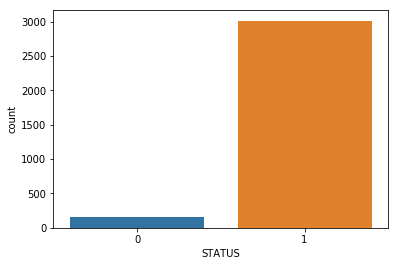

In [79]:
sns.countplot(x='STATUS',data=cleaned_svm)

From the above plot we can see that our data in the target variable is not balanced.this is key as it will help us in setting the arguments while training the model.During training, we can use the argument class_weight='balanced'  to penalize mistakes on the minority class by an amount proportional to how under-represented it is.

We also want to include the argument probability=True  if we want to enable probability estimates for SVM algorithms. we do this so that we dont run the risk of having a high accuracy but with a ton of misclassification performed.

we shall also employ some best practices like cross validation,regularizaton etc

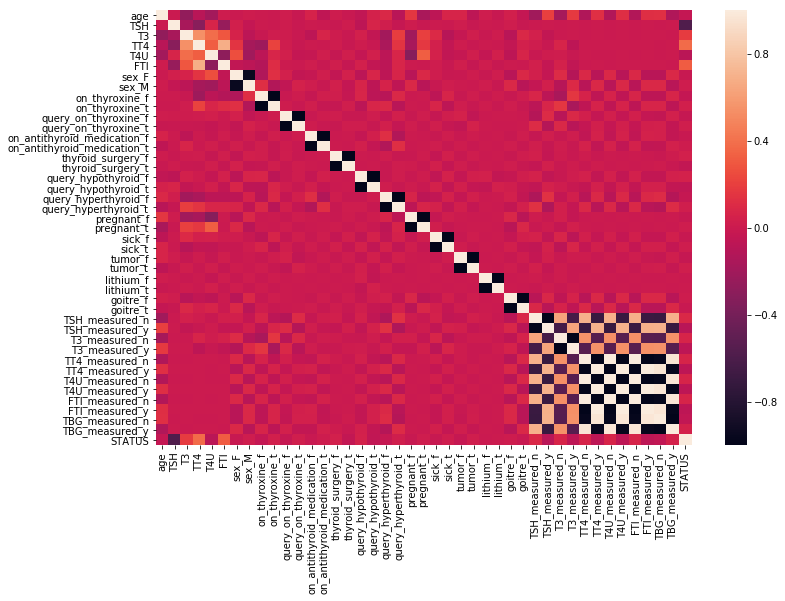

In [80]:
#lets also check how the variables correlate
plt.figure(figsize=(12,8))
sns.heatmap(cleaned_svm.corr())

from the heatmap we see that there exists strong correlations between the independent variables both negatively and positively.This possess a challenge in our feature selection and to overcome this we shall apply the PCA reduction method this is beacause of its ability to account for most of the possible variation. We shall also be scaling our dataset as PCA is sensitive to measurement and also svm uses euclidean distance which is sensitive to to magnitude so we normalise to bring it to a particular range and also for the ske of speed for our algorithm.


In [0]:
#PREDICTORS = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'sex_F', 'sex_M',
 #      'on_thyroxine_f', 'on_thyroxine_t', 'query_on_thyroxine_f',
 #      'query_on_thyroxine_t', 'on_antithyroid_medication_f',
 #      'on_antithyroid_medication_t', 'thyroid_surgery_f', 'thyroid_surgery_t',
 #      'query_hypothyroid_f', 'query_hypothyroid_t', 'query_hyperthyroid_f',
 #      'query_hyperthyroid_t', 'pregnant_f', 'pregnant_t', 'sick_f', 'sick_t',
  #     'tumor_f', 'tumor_t', 'lithium_f', 'lithium_t', 'goitre_f', 'goitre_t',
  #     'TSH_measured_n', 'TSH_measured_y', 'T3_measured_n', 'T3_measured_y',
  #     'TT4_measured_n', 'TT4_measured_y', 'T4U_measured_n', 'T4U_measured_y',
   #    'FTI_measured_n', 'FTI_measured_y', 'TBG_measured_n', 'TBG_measured_y']

In [0]:
#separating the data into target and predictor variables
y = cleaned_svm['STATUS']
cleaned_svm = cleaned_svm.drop('STATUS', axis=1)

In [0]:
# Applying the reduction algorithm: PCA
pca = PCA(n_components=4).fit(cleaned_svm)
X = pca.transform(cleaned_svm)

In [0]:
#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [0]:
# Building the  polynomial model 
hypo_poly =SVC(kernel='poly',degree=3)


In [86]:
# Training the model using the training set
hypo_poly.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
#making predictions
y_pred = hypo_poly.predict(X_test)

In [94]:
#evaluating the model
print('Accuracy',metrics.accuracy_score(y_test,y_pred))

Accuracy 0.976303317535545


In [95]:
#evaluating the model
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

TypeError: ignored

In [0]:
#we now tune the model
def svc_param_selection(X, y, nfolds):
    Cs = [-2,9, 10]
    gammas = [-3, 10, 10]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='poly'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_